In [431]:
import math
import numpy as np
from ambiance import Atmosphere
import matplotlib.pyplot as plt

%matplotlib inline

# Defining atmospheric conditions with a function
def ambient_props(altitude_meters):
    atmosphere = Atmosphere(altitude_meters)
    rho = atmosphere.density
    nu = atmosphere.kinematic_viscosity
    T = atmosphere.temperature
    g = atmosphere.grav_accel

    return rho, nu, T, g

# Import all the variables
altitude = 0 # ASL in metres 
altitide_cruise = 4000 # ASL in metres 
## Do not change the following ______________________:)
air = ambient_props(altitude)
rho, nu , T, g = air[0], air[1], air[2], air[3]
## __________________________________________________:)

In [432]:
W_P_para = np.linspace(0, 2.00, 501)
W_S_para = np.linspace(1, 300, 2001)

V = 27.0 # Airspeed Cruise
V_s = 10.0 # Stall Speed
q = 0.5 * rho * V**2
n_p = 0.7 # Propeller Efficiency. Usually ranges from 0.7 - 0.85
V_max = 1.3 * V

mtow_rfp = 25 * ambient_props(0)[3]

In [433]:
# Some global variables for functions
C_L_max = 1.4 # Maximum Lift coefficient
C_D_0 = 0.035 # For microlight, range-> 0.02-0.035
L_D_max = 14

AR = 12
e = 0.85
k = 1 / (math.pi * e * AR)


In [434]:
# Define all the functions

def stall_constraint():
    """
    Equation for stall constraint
    -----------------------------
    OUTPUT
    W_S
    """
    W_S_stall = 0.5 * rho * C_L_max * V_s**2
    return W_S_stall

def v_max_constraint(W_S):
    """
    Equation for maximum speed for the constraint diagram
    -----------------------------
    OUTPUT
    W_P_vmax
    """
    a = math.sqrt(1.4 * 287 * air[2][0]) # speed of sound at guven conditions 
    alt_mtl = 250
    rho_0 = ambient_props(0)[0]
    rho_1 = ambient_props(alt_mtl)[0]
    #sigma = 0.970725
    sigma_vmax = (1 - 1.6873e-6 * alt_mtl)**(4.26)
    W_P_vmax = (n_p) / ( (0.5 * rho_0 * V_max**3 *C_D_0* (1 / W_S)) + (((2 * k) / (rho_1 * sigma_vmax * V_max)) * (W_S)) )

    return W_P_vmax

def roc_constraint(W_S):
    """
    Equation for rate of climb for the constraint diagram
    -----------------------------
    OUTPUT
    W_P_ROC
    """
    ROC = 5 # Rate of climb :)
    rho_0 = ambient_props(0)[0]
    sq_1 =  rho_0 * np.sqrt((3 * C_D_0) / (k))
    sq_2 = np.sqrt((2 / sq_1) * W_S)
    p_3 = (1.155)/(L_D_max * n_p)
    W_P_ROC = 1 / ((ROC/n_p) + (sq_2 * p_3))

    return W_P_ROC

def cruise_constraint(W_S):
    """
    Equation for cruise for the constraint diagram
    -----------------------------
    OUTPUT
    W_P_cruise
    """
    sigma_ac = (1 - 1.6873e-6 * altitide_cruise)**(4.26)
    roc_c = 2.0
    rho_ac = ambient_props(altitide_cruise)[0]
    sq1 = (2) / (rho_ac * np.sqrt((3 * C_D_0)/(k)))
    sq2 = np.sqrt(sq1 * W_S)
    p3 = (1.155)/(L_D_max * n_p)
    W_P_cruise = (sigma_ac) /( (roc_c/n_p) + (sq2 * p3))

    return W_P_cruise

def bank_constraint(W_S):
    """
    Equation for banking for the constraint diagram
    -----------------------------
    OUTPUT
    W_P_bank
    """

In [435]:
# Run the functions
W_S_stall = stall_constraint()              # Stall Constraint
W_P_vmax = v_max_constraint(W_S_para)       # Maximum Speed Constraint
W_P_ROC = roc_constraint(W_S_para)          # Rate of Climb Constraint
W_P_cruise = cruise_constraint(W_S_para)    # Cruise Constraint

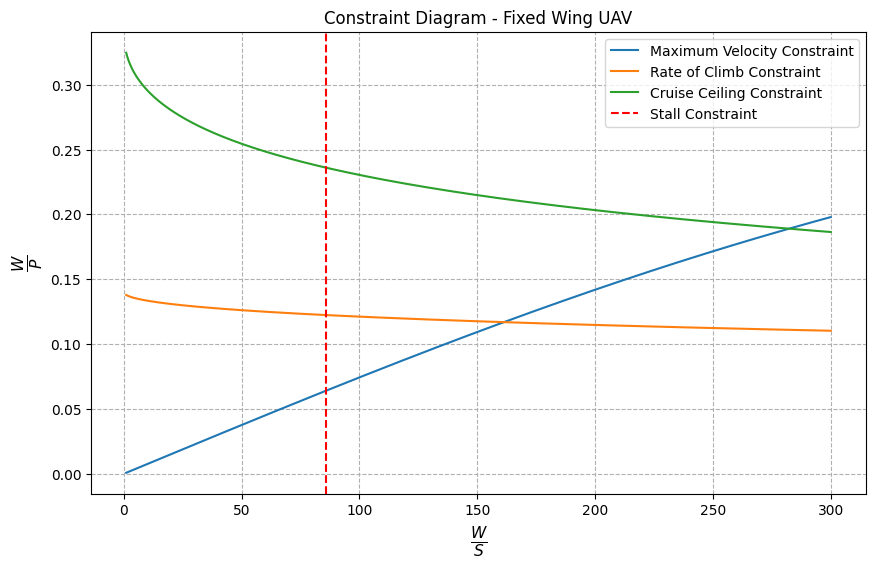

In [436]:
# Plot the constraint Diagram

plt.figure(figsize=(10,6))
plt.plot(W_S_para, W_P_vmax, label='Maximum Velocity Constraint')
plt.plot(W_S_para, W_P_ROC, label='Rate of Climb Constraint')
plt.plot(W_S_para, W_P_cruise, label='Cruise Ceiling Constraint')
plt.axvline(x=W_S_stall, color='red', linestyle='--', label='Stall Constraint')
plt.xlabel(r'$\frac{W}{S}$', fontsize=16)
plt.ylabel(r'$\frac{W}{P}$', fontsize=16)
plt.title(r'Constraint Diagram - Fixed Wing UAV')
plt.grid(True, linestyle='--')
plt.legend()
#plt.savefig('const_dia.eps', format='eps', dpi = 1600)